In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [4]:

# Load the dataset
file_path = 'cars.csv'
df = pd.read_csv(file_path)

# Initial data inspection
print("Initial DataFrame shape:", df.shape)
print(df.head())
print(df.info())


Initial DataFrame shape: (8128, 13)
                           name  year  selling_price  km_driven    fuel  \
0        Maruti Swift Dzire VDI  2014         450000     145500  Diesel   
1  Skoda Rapid 1.5 TDI Ambition  2014         370000     120000  Diesel   
2      Honda City 2017-2020 EXi  2006         158000     140000  Petrol   
3     Hyundai i20 Sportz Diesel  2010         225000     127000  Diesel   
4        Maruti Swift VXI BSIII  2007         130000     120000  Petrol   

  seller_type transmission         owner     mileage   engine   max_power  \
0  Individual       Manual   First Owner   23.4 kmpl  1248 CC      74 bhp   
1  Individual       Manual  Second Owner  21.14 kmpl  1498 CC  103.52 bhp   
2  Individual       Manual   Third Owner   17.7 kmpl  1497 CC      78 bhp   
3  Individual       Manual   First Owner   23.0 kmpl  1396 CC      90 bhp   
4  Individual       Manual   First Owner   16.1 kmpl  1298 CC    88.2 bhp   

                     torque  seats  
0            

In [5]:

# Drop rows with missing values
df_clean = df.dropna()
print("Cleaned DataFrame shape:", df_clean.shape)


Cleaned DataFrame shape: (7906, 13)


Mean Squared Error: 578552363987.58
R^2 Score: 0.17

5 Worst Predictions:
    Actual     Predicted         Error
0  5500000  1.018879e+06  4.481121e+06
1  5830000  1.010227e+06  4.819773e+06
2  6000000  1.013471e+06  4.986529e+06
3  6000000  9.236236e+05  5.076376e+06
4  6000000  9.236236e+05  5.076376e+06


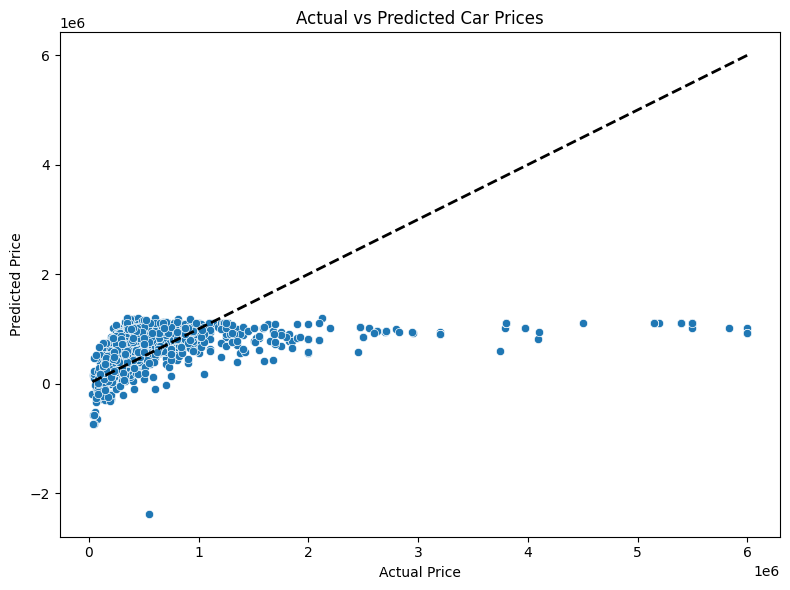


Model Coefficients:
     Feature    Coefficient
0       year  305339.539910
1  km_driven  -61415.626308


In [13]:
# Define the regression question:
# Can we predict the price of a car based on its other attributes?
# Stakeholder: Used car dealership assessing resale price
# Target variable (label): Price (continuous)
# Features: Year, Mileage, EngineV (Engine Volume), and Brand (encoded)

# Encode categorical features
if 'Brand' in df_clean.columns:
    df_clean = pd.get_dummies(df_clean, columns=['Brand'], drop_first=True)

# Select features and target
features = ['year', 'km_driven']
X = df_clean[features]
y = df_clean['selling_price']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Model training
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")

# Find 5 worst predictions
errors = np.abs(y_test - y_pred)
worst_indices = errors.argsort()[-5:]
wrong_preds = pd.DataFrame({
    'Actual': y_test.iloc[worst_indices].values,
    'Predicted': y_pred[worst_indices],
    'Error': errors.iloc[worst_indices].values
})
print("\n5 Worst Predictions:")
print(wrong_preds)

# Plotting predicted vs actual
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Car Prices')
plt.tight_layout()
plt.savefig('actual_vs_predicted.png')
plt.show()

# Save model coefficients for interpretation
coef_df = pd.DataFrame({
    'Feature': features,
    'Coefficient': model.coef_
})
print("\nModel Coefficients:")
print(coef_df)

# Save to GitHub-ready format
coef_df.to_csv('model_coefficients.csv', index=False)
wrong_preds.to_csv('worst_predictions.csv', index=False)
